In [1]:
import pandas as pd 
import numpy as np
# import geopandas as gpd 
from patsy import dmatrices
import statsmodels.api as sm
import os
pd.set_option('display.max_columns', None)

In [4]:
geogon_od = pd.read_csv('geogon_od.csv')
geogon_od 

# Rename our columns to have no spaces (needed for OLS modeling later)
geogon_od.columns = ['Year', 'FIPS', 'State', 'County', 'Deaths', 'Population', 'Crude_Rate',
       'Cruder_Rate', 'Deathrate_per_100', 'Unemployment_rate',
       'Dispense_rate', 'SUMLEV', 'AGEGRP', 'TOT_POP', 'TOT_MALE',
       'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE',
       'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE',
       'TOM_FEMALE', 'NH_MALE', 'NH_FEMALE', 'H_MALE', 'H_FEMALE',
       'Urbanicity', 'Jail_Population', 'Incarceration_Rate_per_100k',
       'PovertyCount', 'PovertyPercentage', 'MedianHHI', 'Latitude',
       'Longitude', 'geometry']


# Convert FIPS to string 
geogon_od['FIPS'] = geogon_od['FIPS'].astype(str).str.zfill(5) 
geogon_od

,Year,FIPS,State,County,Deaths,Population,Crude_Rate,Cruder_Rate,Deathrate_per_100,Unemployment_rate,Dispense_rate,SUMLEV,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,NH_MALE,NH_FEMALE,H_MALE,H_FEMALE,Urbanicity,Jail_Population,Incarceration_Rate_per_100k,PovertyCount,PovertyPercentage,MedianHHI,Latitude,Longitude,geometry
0,1999.0,01003,Alabama,"Baldwin County, AL",11.0,137555.0,Unreliable,7.996801,0.007997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small/mid,390.000000,440.340000,14668.0,10.5,39194.0,30.659218,-87.746067,"POLYGON ((-88.026319 30.753358, -87.944546 30...."
1,1999.0,01073,Alabama,"Jefferson County, AL",34.0,662845.0,5.13,5.129404,0.005129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,urban,1779.000000,408.230000,89661.0,13.7,35885.0,33.553444,-86.896536,"POLYGON ((-87.26692299999999 33.512929, -87.27..."
2,1999.0,01089,Alabama,"Madison County, AL",10.0,274693.0,Unreliable,3.640428,0.003640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small/mid,713.000000,382.130000,30056.0,11.1,43718.0,34.764238,-86.551080,"POLYGON ((-86.78362801716901 34.991924921992, ..."
3,1999.0,01097,Alabama,"Mobile County, AL",28.0,399323.0,7.01,7.011868,0.007012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small/mid,1223.000000,470.210000,72372.0,18.3,32396.0,30.684572,-88.196568,"POLYGON ((-88.432007 31.114297999999998, -88.3..."
4,1999.0,02020,Alaska,"Anchorage Borough, AK",21.0,259348.0,8.10,8.097228,0.008097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small/mid,NaN,NaN,18397.0,7.2,52959.0,61.174250,-149.284329,"POLYGON ((-150.228774 61.162580999999996, -150..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15891,2020.0,55139,Wisconsin,"Winnebago County, WI",38.0,171631.0,22.14,22.140522,0.022141,5.4,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14219.0,8.7,64653.0,44.085707,-88.668149,"POLYGON ((-88.886673 44.242622, -88.7662 44.24..."
15892,2020.0,55141,Wisconsin,"Wood County, WI",18.0,72560.0,Unreliable,24.807056,0.024807,6.7,47.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6732.0,9.4,54154.0,44.461413,-90.038825,"POLYGON ((-90.31605499999999 44.424502, -90.31..."
15893,2020.0,56021,Wyoming,"Laramie County, WY",17.0,100595.0,Unreliable,16.899448,0.016899,5.1,51.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7242.0,7.4,69450.0,41.292830,-104.660395,"POLYGON ((-105.27823599999999 41.656655, -104...."
15894,2020.0,56025,Wyoming,"Natrona County, WY",16.0,80815.0,Unreliable,19.798305,0.019798,7.8,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7420.0,9.4,65901.0,42.977645,-106.768219,"POLYGON ((-107.543526 42.781558, -107.501425 4..."


## DEALING WITH MISSING DATA 

In [6]:
conda install -c conda-forge missingno

Solving environment: done

## Package Plan ##

  environment location: /Users/wei/opt/anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       h033912b_0         139 KB  conda-forge
    certifi-2021.10.8          |   py38h50d1736_2         145 KB  conda-forge
    conda-4.12.0               |   py38h50d1736_0        1020 KB  conda-forge
    missingno-0.4.2            |             py_1          12 KB  conda-forge
    openssl-1.1.1n             |       h6c3fc93_0         1.9 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/noarch::missingno-0.4.2-py_1
  python

In [7]:
import missingno as msno

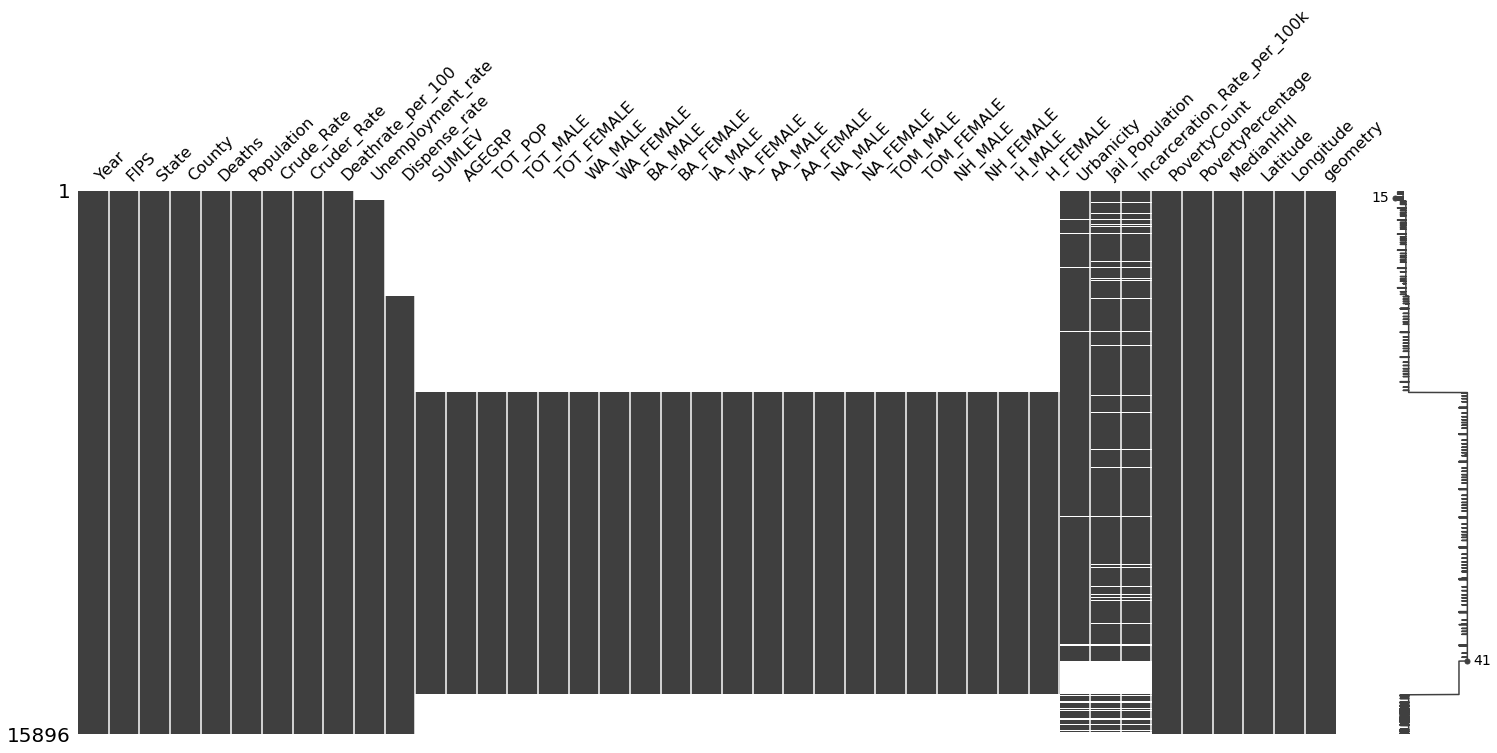

In [8]:
msno.matrix(geogon_od);

in our write-up analysis, we will only be considering 2010-2019 since we are missing the demographics data from all other years. 


we will be adding in the 2018 Incarceration_Rate_per_100k as a replacement for it's 2019 data (note there was a big decrease in incarceration rates in 2020 bc of the quarantine so we did not take an avg of the two adjacent years) 

In [9]:
### Analyze our data without most of the demographic data 
geogon_nodem = geogon_od.drop(geogon_od.columns[15:32], axis = 1)
# geogon_od.drop(nonnum_features, axis = 1)

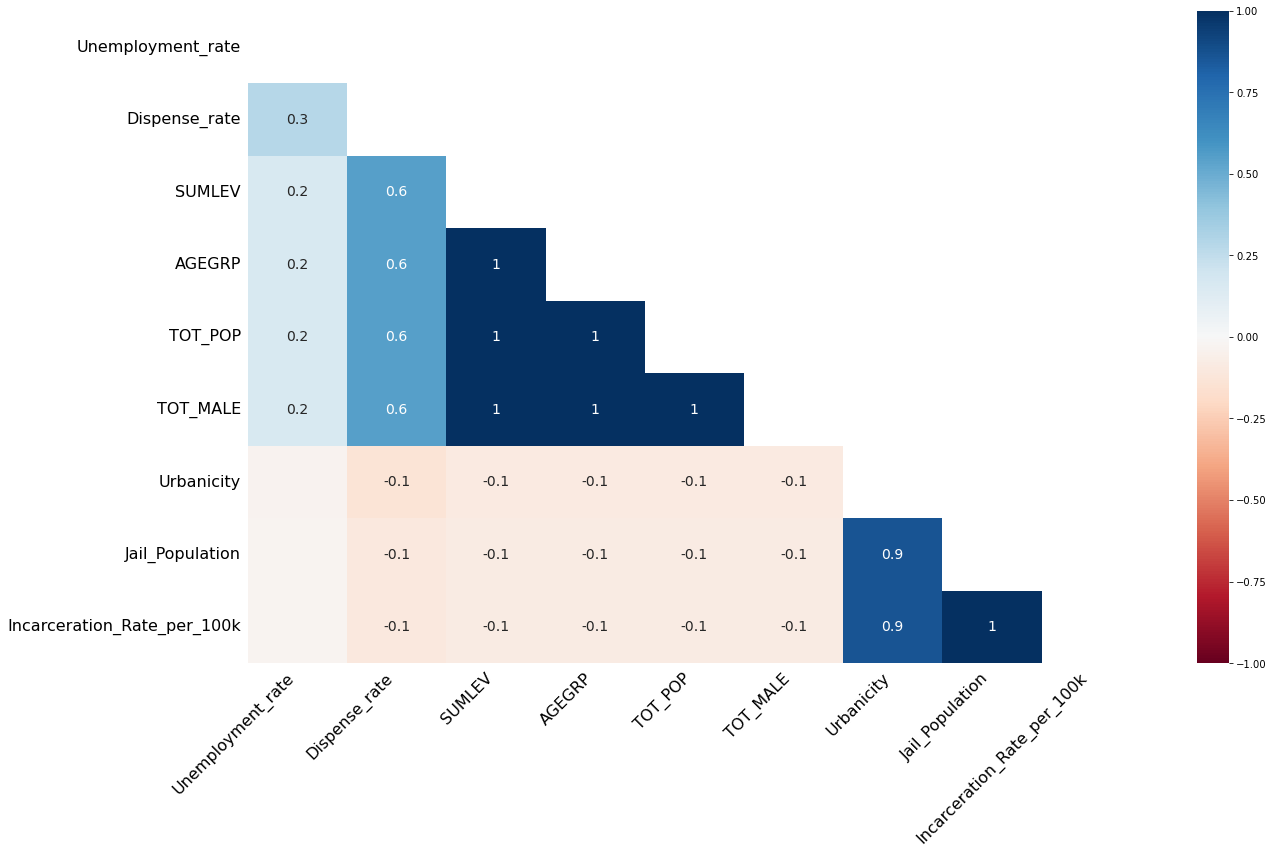

In [10]:
### CORRELATION ACCORDING MISSING VALUES 
msno.heatmap(geogon_nodem);

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another: 

documentation: https://github.com/ResidentMario/missingno 

In [11]:
# detailed numbers for correlations for matrix above 
df = geogon_nodem.iloc[:, [i for i, n in enumerate(np.var(geogon_nodem.isnull(), axis='rows')) if n > 0]]
corr_mat = df.isnull().corr()
corr_mat

,Unemployment_rate,Dispense_rate,SUMLEV,AGEGRP,TOT_POP,TOT_MALE,Urbanicity,Jail_Population,Incarceration_Rate_per_100k
Unemployment_rate,1.000000,0.283027,0.158532,0.158532,0.158532,0.158532,-0.038610,-0.025133,-0.025133
Dispense_rate,0.283027,1.000000,0.548387,0.548387,0.548387,0.548387,-0.140034,-0.108905,-0.108905
SUMLEV,0.158532,0.548387,1.000000,1.000000,1.000000,1.000000,-0.093264,-0.079084,-0.079084
AGEGRP,0.158532,0.548387,1.000000,1.000000,1.000000,1.000000,-0.093264,-0.079084,-0.079084
TOT_POP,0.158532,0.548387,1.000000,1.000000,1.000000,1.000000,-0.093264,-0.079084,-0.079084
TOT_MALE,0.158532,0.548387,1.000000,1.000000,1.000000,1.000000,-0.093264,-0.079084,-0.079084
Urbanicity,-0.038610,-0.140034,-0.093264,-0.093264,-0.093264,-0.093264,1.000000,0.866623,0.866623
Jail_Population,-0.025133,-0.108905,-0.079084,-0.079084,-0.079084,-0.079084,0.866623,1.000000,1.000000
Incarceration_Rate_per_100k,-0.025133,-0.108905,-0.079084,-0.079084,-0.079084,-0.079084,0.866623,1.000000,1.000000


### FILLING IN MISSING INCARCERATION DATA

In [12]:
geogon_od.groupby('Year').mean()

,Deaths,Population,Cruder_Rate,Deathrate_per_100,Unemployment_rate,Dispense_rate,SUMLEV,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,NH_MALE,NH_FEMALE,H_MALE,H_FEMALE,Jail_Population,Incarceration_Rate_per_100k,PovertyCount,PovertyPercentage,MedianHHI,Latitude,Longitude
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999.0,43.555921,572798.555921,8.030704,0.008031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1365.668772,367.767509,66356.690789,11.136842,43173.726974,37.915685,-92.371327
2000.0,41.021407,550509.048930,8.089048,0.008089,4.004281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1303.648084,362.731136,59734.932722,10.470336,45309.226300,37.931566,-91.039656
2001.0,39.828418,502528.361930,9.292622,0.009293,4.743164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1162.730682,366.685426,56260.646113,11.067024,44232.455764,37.669659,-89.731386
2002.0,42.926606,454856.417431,11.062642,0.011063,5.726376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1074.480865,379.830673,53662.217890,11.449083,44207.417431,37.834022,-90.865661
2003.0,40.972441,408695.933071,12.437209,0.012437,5.991339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,990.888971,388.894506,50288.624016,12.100394,44088.791339,37.604391,-90.601783
2004.0,40.095841,384420.708861,13.196182,0.013196,5.647378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,946.835695,403.350902,48465.262206,12.589873,44764.520796,37.690760,-90.378170
2005.0,41.963979,373678.807890,13.884325,0.013884,5.298100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,929.928615,407.062611,46934.948542,13.316981,46298.166381,37.692520,-90.566926
2006.0,43.388805,347913.352496,15.756374,0.015756,4.874848,92.066415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.250457,421.629811,43936.285930,13.477156,47908.633888,37.783387,-89.958696
2007.0,43.421583,340280.787050,16.184708,0.016185,4.742878,95.457698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,855.930089,418.580790,41735.007194,13.179137,49954.489209,37.633187,-90.221341


In [13]:
# Get 2019 and 2018 incarceration columns 
incar19 = geogon_od[geogon_od['Year'] == 2019][['FIPS', 'Incarceration_Rate_per_100k']]
incar18 = geogon_od[geogon_od['Year'] == 2018][['FIPS', 'Incarceration_Rate_per_100k']]

# Merge 2018 rates to 2019 counties 
incar19 = incar19.merge(incar18, on = ['FIPS'], how = 'left')
incar19 = incar19.drop('Incarceration_Rate_per_100k_x', axis = 1)

# Place 2019's new rate back into df 
geogon_od.loc[geogon_od['Year'] == 2019, 'Incarceration_Rate_per_100k'] = np.array(incar19['Incarceration_Rate_per_100k_y'])
geogon_od[geogon_od['Year'] == 2019]['Incarceration_Rate_per_100k']

13755    477.31
13756    369.20
13757    673.96
13758    676.19
13759    523.14
          ...  
14732    272.00
14733       NaN
14734       NaN
14735       NaN
14736    516.48
Name: Incarceration_Rate_per_100k, Length: 982, dtype: float64

In [14]:
# Check the proportion of missing variable that are now present in 2019 incarcertation rates 
geogon_od[geogon_od['Year'] == 2018]['Incarceration_Rate_per_100k'].isnull().sum()

33

In [15]:
geogon_od[geogon_od['Year'] == 2019]['Incarceration_Rate_per_100k'].isnull().sum()

143

In [16]:
len(geogon_od[geogon_od['Year'] == 2019]['Incarceration_Rate_per_100k'])

982

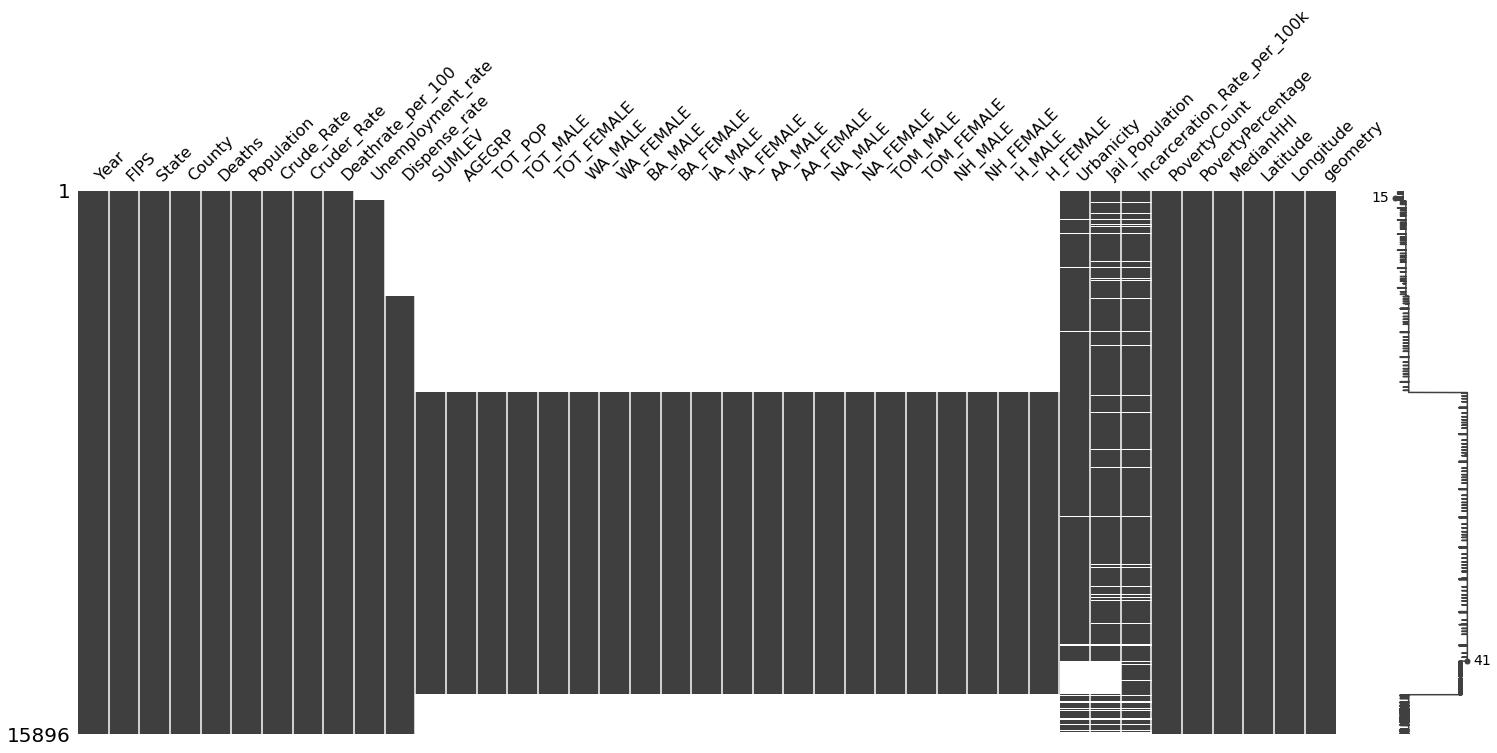

In [17]:
msno.matrix(geogon_od);

Observe that we have now filled in the 2019 incarceration rates in our overall data. 

### QUANTIFYING THE URBANICITY COLUMN 

In [18]:
geogon_od['Urbanicity'].unique()

array(['small/mid', 'urban', 'rural', 'suburban', nan], dtype=object)

In [19]:
urban_dict = {'rural' : 1, 'small/mid' : 2, 'suburban': 3, 'urban' : 4}
geogon_od = geogon_od.replace({"Urbanicity": urban_dict})
geogon_od['Urbanicity']

0        2.0
1        4.0
2        2.0
3        2.0
4        2.0
        ... 
15891    NaN
15892    NaN
15893    NaN
15894    NaN
15895    1.0
Name: Urbanicity, Length: 15896, dtype: float64

## OLS MODELING 

In [20]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [21]:
geogon_od.describe()

,Year,Deaths,Population,Cruder_Rate,Deathrate_per_100,Unemployment_rate,Dispense_rate,SUMLEV,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,NH_MALE,NH_FEMALE,H_MALE,H_FEMALE,Urbanicity,Jail_Population,Incarceration_Rate_per_100k,PovertyCount,PovertyPercentage,MedianHHI,Latitude,Longitude
count,15896.000000,15896.000000,1.589600e+04,15896.000000,15896.000000,15583.000000,12810.000000,8835.0,8835.0,8.835000e+03,8.835000e+03,8.835000e+03,8.835000e+03,8.835000e+03,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8.835000e+03,8.835000e+03,8.835000e+03,8.835000e+03,14446.000000,14022.000000,14861.000000,1.589600e+04,15896.000000,15896.000000,15896.000000,15896.000000
mean,2011.470684,51.186273,3.334577e+05,20.013271,0.020013,6.180485,84.601928,50.0,0.0,3.032371e+05,1.487825e+05,1.544546e+05,1.136194e+05,1.161870e+05,19947.755065,22079.318506,1708.649010,1676.362649,9113.687832,10001.691454,394.560611,385.769779,3998.416978,4124.518280,1.194493e+05,1.255460e+05,2.933322e+04,2.890864e+04,2.262218,788.128185,408.027474,4.353267e+04,13.823673,52659.995848,37.889924,-89.645150
std,5.940103,86.291001,5.939957e+05,14.054437,0.014054,2.565320,42.393726,0.0,0.0,5.643871e+05,2.771774e+05,2.872857e+05,1.997819e+05,2.015472e+05,47902.001421,55911.274084,4521.850938,4526.174415,35833.114391,39637.206151,2018.939053,1982.527505,9005.074156,9207.680482,1.807732e+05,1.918771e+05,1.129843e+05,1.135570e+05,0.861014,1358.736723,268.336997,9.235076e+04,5.292195,15126.667939,4.983986,15.094068
min,1999.000000,10.000000,1.028500e+04,0.693131,0.000693,1.600000,2.000000,50.0,0.0,1.027000e+04,5.103000e+03,5.167000e+03,2.695000e+03,2.889000e+03,10.000000,7.000000,7.000000,5.000000,5.000000,7.000000,0.000000,0.000000,36.000000,34.000000,2.956000e+03,3.171000e+03,2.500000e+01,2.200000e+01,1.000000,1.000000,1.084545,1.523000e+03,2.100000,17345.000000,19.597764,-159.705965
25%,2007.000000,14.000000,8.233825e+04,10.880098,0.010880,4.300000,56.200000,50.0,0.0,7.455550e+04,3.695450e+04,3.721650e+04,3.148900e+04,3.203800e+04,1217.000000,838.500000,191.000000,174.000000,300.000000,387.000000,24.000000,22.000000,703.000000,703.500000,3.330400e+04,3.429950e+04,1.612000e+03,1.434000e+03,2.000000,203.000000,240.870000,1.076875e+04,10.000000,42011.750000,34.874922,-94.816277
50%,2012.000000,23.000000,1.600735e+05,16.221788,0.016222,5.700000,78.700000,50.0,0.0,1.423080e+05,7.000100e+04,7.211200e+04,5.702900e+04,5.920200e+04,4518.000000,4118.000000,483.000000,469.000000,1044.000000,1253.000000,66.000000,60.000000,1504.000000,1532.000000,6.160900e+04,6.451400e+04,4.637000e+03,4.296000e+03,2.000000,384.000000,348.060000,1.899600e+04,13.400000,49791.500000,38.509051,-84.762138
75%,2017.000000,50.000000,3.569068e+05,24.980064,0.024980,7.500000,104.600000,50.0,0.0,3.039055e+05,1.490345e+05,1.543235e+05,1.173815e+05,1.200660e+05,16631.000000,17839.500000,1419.000000,1372.500000,4653.500000,5095.500000,186.500000,177.500000,3641.000000,3758.000000,1.284835e+05,1.344955e+05,1.709800e+04,1.607600e+04,3.000000,866.000000,500.320000,4.194775e+04,17.000000,60009.500000,41.152686,-80.107795
max,2020.000000,2021.000000,1.017029e+07,171.435328,0.171435,29.400000,426.400000,50.0,0.0,1.010571e+07,4.980981e+06,5.125335e+06,3.593116e+06,3.588091e+06,596145.000000,714651.000000,74619.000000,71383.000000,722516.000000,822929.000000,48399.000000,46902.000000,155367.000000,160201.000000,2.539478e+06,2.672673e+06,2.443961e+06,2.455422e+06,4.000000,21359.010000,5463.136066,1.873522e+06,44.700000,155362.000000,64.676044,-67.609354


In [22]:
## STANDARDIZE OUR NON NUMERIC VARIABLES ## 
nonnum_features = ['Cruder_Rate', 'Year', 'FIPS', 'State', 'County', 'Latitude',
                   'Longitude', 'geometry']
stzd_geogon = standardize(geogon_od.drop(nonnum_features, axis = 1))
stzd_geogon[nonnum_features] = geogon_od[nonnum_features]
stzd_geogon


# Convert to geopandas 
# stzd_geogon = gpd.GeoDataFrame(stzd_geogon)

# Convert FIPS to string 
stzd_geogon['FIPS'] = stzd_geogon['FIPS'].astype(str).str.zfill(5)
stzd_geogon.dtypes

/Users/wei/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/wei/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


AA_FEMALE                      float64
AA_MALE                        float64
AGEGRP                         float64
BA_FEMALE                      float64
BA_MALE                        float64
Crude_Rate                      object
Deathrate_per_100              float64
Deaths                         float64
Dispense_rate                  float64
H_FEMALE                       float64
H_MALE                         float64
IA_FEMALE                      float64
IA_MALE                        float64
Incarceration_Rate_per_100k    float64
Jail_Population                float64
MedianHHI                      float64
NA_FEMALE                      float64
NA_MALE                        float64
NH_FEMALE                      float64
NH_MALE                        float64
Population                     float64
PovertyCount                   float64
PovertyPercentage              float64
SUMLEV                         float64
TOM_FEMALE                     float64
TOM_MALE                 

In [23]:
### FILTER TO WRITE-UP YEARS ### 
stzd_geogon15 = stzd_geogon[(stzd_geogon['Year'] >= 2010) & (stzd_geogon['Year'] <= 2019)] 

# rename cols to have no spaces 
stzd_geogon15 = stzd_geogon15[['Year', 'AA_FEMALE', 'AA_MALE', 'BA_FEMALE', 'BA_MALE', 'Urbanicity', 'Cruder_Rate', 'Dispense_rate', 
                               'H_FEMALE', 'H_MALE', 'IA_FEMALE', 'IA_MALE', 'Incarceration_Rate_per_100k', 'MedianHHI',
                               'NA_FEMALE', 'NA_MALE', 'NH_FEMALE', 'NH_MALE', 'PovertyPercentage', 'TOM_FEMALE', 
                               'TOM_MALE', 'TOT_FEMALE', 'TOT_MALE', 'Unemployment_rate', 'WA_FEMALE', 'WA_MALE',
                               'Jail_Population', 'PovertyCount']]
stzd_geogon15

,Year,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,Urbanicity,Cruder_Rate,Dispense_rate,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,Incarceration_Rate_per_100k,MedianHHI,NA_FEMALE,NA_MALE,NH_FEMALE,NH_MALE,PovertyPercentage,TOM_FEMALE,TOM_MALE,TOT_FEMALE,TOT_MALE,Unemployment_rate,WA_FEMALE,WA_MALE,Jail_Population,PovertyCount
5902,2010.0,-0.231379,-0.238974,-0.235517,-0.240625,-0.304556,14.264944,1.396442,-0.222770,-0.220213,-0.222135,-0.231699,0.808237,-0.333329,-0.166852,-0.159281,-0.185895,-0.189659,-0.098955,-0.310467,-0.311222,-0.212214,-0.213458,1.449969,-0.170838,-0.174712,-0.039441,-0.210906
5903,2010.0,-0.250251,-0.253012,-0.387928,-0.407600,0.856906,17.445309,-0.577984,-0.236235,-0.236765,-0.332167,-0.338520,-0.280096,-0.644841,-0.181985,-0.178104,-0.514103,-0.518072,0.505728,-0.412779,-0.412393,-0.436746,-0.434394,1.372003,-0.437599,-0.431517,-0.488617,-0.370065
5904,2010.0,-0.239150,-0.243886,-0.159893,-0.179977,-0.304556,17.710758,2.309349,-0.238921,-0.240810,-0.311177,-0.306451,0.861679,-0.974733,-0.168365,-0.164234,-0.344057,-0.356712,1.828472,-0.345331,-0.345982,-0.324234,-0.330805,1.956744,-0.346355,-0.347871,-0.208104,-0.177380
5905,2010.0,-0.250201,-0.252565,-0.355643,-0.371629,0.856906,25.204500,0.709993,-0.241827,-0.242111,-0.348960,-0.353780,0.756882,-0.932620,-0.181481,-0.167702,-0.546970,-0.552250,1.242686,-0.425703,-0.420056,-0.460908,-0.458864,1.527934,-0.480043,-0.473585,-0.451265,-0.375966
5906,2010.0,-0.250806,-0.253291,-0.294024,-0.278287,-1.466018,26.096714,1.441262,-0.252166,-0.255627,-0.225007,-0.235459,1.201748,-1.407823,-0.191065,-0.189001,-0.559035,-0.553865,2.319777,-0.420381,-0.410949,-0.473053,-0.465427,2.112675,-0.517263,-0.507815,-0.443816,-0.372479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14732,2019.0,-0.183113,-0.184189,-0.367967,-0.358100,NaN,11.634198,-0.931824,-0.222127,-0.225966,-0.237380,-0.220420,-0.506945,0.461650,-0.169374,-0.170179,-0.228039,-0.203721,-0.779223,-0.284400,-0.263024,-0.240108,-0.224975,-1.239840,-0.184171,-0.174667,NaN,-0.298520
14733,2019.0,-0.233271,-0.235039,-0.389216,-0.408456,NaN,16.438581,-0.799723,-0.244645,-0.249068,-0.287094,-0.300701,NaN,0.308406,-0.192578,-0.186525,-0.467133,-0.468527,-0.590260,-0.394641,-0.389849,-0.408699,-0.407096,-0.966961,-0.402340,-0.398449,NaN,-0.387650
14734,2019.0,-0.249343,-0.252007,-0.393204,-0.413362,NaN,28.017626,-0.863414,-0.243360,-0.246590,0.602008,0.563153,NaN,0.349923,-0.189047,-0.189001,-0.559192,-0.559812,-0.174540,-0.383562,-0.377522,-0.469676,-0.465622,-0.655099,-0.505498,-0.495510,NaN,-0.417938
14735,2019.0,-0.234608,-0.236239,-0.377178,-0.384761,NaN,16.080402,-0.733673,-0.191039,-0.192128,-0.241799,-0.254257,NaN,1.120771,-0.156763,-0.155318,-0.436111,-0.424109,-0.817016,-0.292220,-0.275795,-0.366790,-0.354917,-1.044926,-0.351729,-0.338030,NaN,-0.371840


In [24]:
print("sm.OLS will drop", len(stzd_geogon15) - len(stzd_geogon15.dropna()), "observations")
stzd_geogon15.dropna()

sm.OLS will drop 1244 observations


,Year,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,Urbanicity,Cruder_Rate,Dispense_rate,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,Incarceration_Rate_per_100k,MedianHHI,NA_FEMALE,NA_MALE,NH_FEMALE,NH_MALE,PovertyPercentage,TOM_FEMALE,TOM_MALE,TOT_FEMALE,TOT_MALE,Unemployment_rate,WA_FEMALE,WA_MALE,Jail_Population,PovertyCount
5902,2010.0,-0.231379,-0.238974,-0.235517,-0.240625,-0.304556,14.264944,1.396442,-0.222770,-0.220213,-0.222135,-0.231699,0.808237,-0.333329,-0.166852,-0.159281,-0.185895,-0.189659,-0.098955,-0.310467,-0.311222,-0.212214,-0.213458,1.449969,-0.170838,-0.174712,-0.039441,-0.210906
5903,2010.0,-0.250251,-0.253012,-0.387928,-0.407600,0.856906,17.445309,-0.577984,-0.236235,-0.236765,-0.332167,-0.338520,-0.280096,-0.644841,-0.181985,-0.178104,-0.514103,-0.518072,0.505728,-0.412779,-0.412393,-0.436746,-0.434394,1.372003,-0.437599,-0.431517,-0.488617,-0.370065
5904,2010.0,-0.239150,-0.243886,-0.159893,-0.179977,-0.304556,17.710758,2.309349,-0.238921,-0.240810,-0.311177,-0.306451,0.861679,-0.974733,-0.168365,-0.164234,-0.344057,-0.356712,1.828472,-0.345331,-0.345982,-0.324234,-0.330805,1.956744,-0.346355,-0.347871,-0.208104,-0.177380
5905,2010.0,-0.250201,-0.252565,-0.355643,-0.371629,0.856906,25.204500,0.709993,-0.241827,-0.242111,-0.348960,-0.353780,0.756882,-0.932620,-0.181481,-0.167702,-0.546970,-0.552250,1.242686,-0.425703,-0.420056,-0.460908,-0.458864,1.527934,-0.480043,-0.473585,-0.451265,-0.375966
5906,2010.0,-0.250806,-0.253291,-0.294024,-0.278287,-1.466018,26.096714,1.441262,-0.252166,-0.255627,-0.225007,-0.235459,1.201748,-1.407823,-0.191065,-0.189001,-0.559035,-0.553865,2.319777,-0.420381,-0.410949,-0.473053,-0.465427,2.112675,-0.517263,-0.507815,-0.443816,-0.372479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13750,2018.0,-0.237485,-0.239420,-0.384637,-0.402318,-1.466018,20.247209,-0.924747,-0.206874,-0.205555,-0.321341,-0.317067,0.105216,0.765163,-0.179967,-0.181571,-0.412292,-0.408647,-0.703638,-0.373353,-0.366416,-0.357141,-0.350306,-1.239840,-0.329619,-0.321080,-0.361472,-0.361878
13751,2018.0,-0.226711,-0.229541,-0.378734,-0.398268,0.856906,15.476112,-0.858697,-0.236262,-0.239872,-0.309189,-0.321490,-0.541865,1.529731,-0.179967,-0.180085,-0.309888,-0.300987,-1.761834,-0.357930,-0.348647,-0.300361,-0.294079,-1.395771,-0.253419,-0.246530,-0.411521,-0.405788
13752,2018.0,-0.053859,-0.048887,-0.337059,-0.340626,0.856906,17.862814,-0.790288,-0.170256,-0.173354,-0.225449,-0.236343,-0.752242,2.292249,-0.142135,-0.143926,0.361836,0.380491,-1.667352,-0.126154,-0.118653,0.174371,0.177490,-1.356788,0.364868,0.348843,-0.188511,-0.255509
13753,2018.0,-0.184678,-0.185863,-0.370882,-0.361253,-0.304556,16.372354,-0.943618,-0.223192,-0.226976,-0.241357,-0.222853,-0.506945,0.338817,-0.172401,-0.173151,-0.230494,-0.205508,-0.646949,-0.288093,-0.267133,-0.242169,-0.226552,-1.317806,-0.185704,-0.175528,-0.351904,-0.288233


In [25]:
"Cruder_Rate ~ AA_FEMALE + AA_MALE + BA_FEMALE + BA_MALE + \
H_FEMALE + H_MALE + IA_FEMALE + IA_MALE + NA_FEMALE + NA_MALE + NH_FEMALE + NH_MALE + \
TOM_FEMALE + TOM_MALE + WA_FEMALE + WA_MALE + \
Unemployment_rate + Dispense_rate + Incarceration_Rate_per_100k + PovertyPercentage + MedianHHI"

'Cruder_Rate ~ AA_FEMALE + AA_MALE + BA_FEMALE + BA_MALE + H_FEMALE + H_MALE + IA_FEMALE + IA_MALE + NA_FEMALE + NA_MALE + NH_FEMALE + NH_MALE + TOM_FEMALE + TOM_MALE + WA_FEMALE + WA_MALE + Unemployment_rate + Dispense_rate + Incarceration_Rate_per_100k + PovertyPercentage + MedianHHI'

### MODELING WITHOUT SPATIAL COVARIATES 

In [45]:
### MANUALLY CHOSEN FEATURES ### 
y, X = dmatrices("Cruder_Rate ~ Year + WA_MALE + Urbanicity + Unemployment_rate + \
Dispense_rate + Incarceration_Rate_per_100k + PovertyPercentage + MedianHHI", 
                 data=stzd_geogon15, return_type='dataframe')
mod = sm.OLS(np.log(y), X, cov_type = 'HC3')
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Cruder_Rate   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     422.6
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:06:00   Log-Likelihood:                -4774.5
No. Observations:                7591   AIC:                             9567.
Df Residuals:                    7582   BIC:                             9629.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

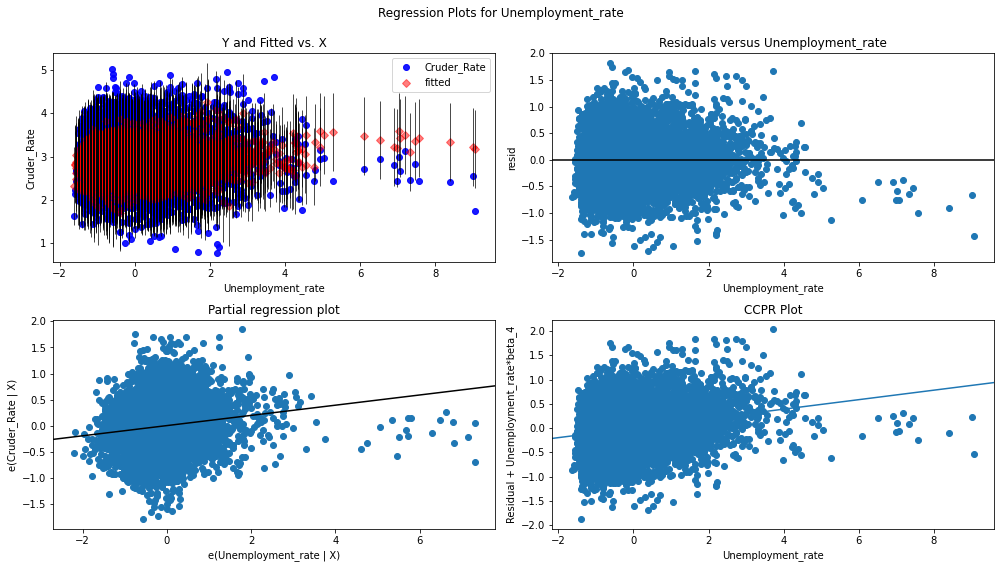

In [46]:
# plot residuals
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(res,'Unemployment_rate',fig=fig)

In [56]:
### OLS WITH EXHAUSTIVE BEST SUBSET 
y, X = dmatrices("Cruder_Rate ~ Year + Unemployment_rate + Dispense_rate + \
                 AA_MALE + TOM_MALE + NH_MALE + Jail_Population + \
                 Incarceration_Rate_per_100k + PovertyCount + MedianHHI", 
                 data=stzd_geogon15, return_type='dataframe')
mod = sm.OLS(np.log(y), X)
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())

bss_coef = round(res.params, 3)
bss_pval = round(res.pvalues, 3)
bss_df = pd.concat([bss_coef, bss_pval], axis = 1)
bss_df = bss_df.rename(columns={0: 'Estimate', 1: 'P-value'})
bss_df.loc['spatmax'] = ['N/A', 'N/A']
bss_df.loc['spatmean'] = ['N/A', 'N/A']
bss_df

                            OLS Regression Results                            
Dep. Variable:            Cruder_Rate   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     336.5
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:43:19   Log-Likelihood:                -4779.5
No. Observations:                7591   AIC:                             9581.
Df Residuals:                    7580   BIC:                             9657.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

,Estimate,P-value
Intercept,-223.7,0.0
Year,0.112,0.0
Unemployment_rate,0.082,0.0
Dispense_rate,0.178,0.0
AA_MALE,0.012,0.353
TOM_MALE,-0.032,0.106
NH_MALE,0.163,0.0
Jail_Population,-0.043,0.009
Incarceration_Rate_per_100k,0.008,0.18
PovertyCount,-0.15,0.0


Note that we did not include spatial components in our exhaustive search. 


Low R-squared, slightly better than manually chosen

F-test is 0 so we reject the null hypothesis that the model with no covariates is better – i.e. this says our model is better nothing! This applies for all of our models. 

All our variables are significant. This may be due to our large number of observations (7591 observations vs 10 features). 

We compare the AIC of our different models. This exhaustive search (with no spat comp) has the lowest AIC (an indication of a better model). 

### MODELING WITH NAIVE SPATIAL COMPONENTS

In [ ]:
read_csv('geoj')

In [57]:
#### CREATING NAIVE SPATCOMP TABLE ### 
geogon_spat = geogon_od[(geogon_od['Year'] >= 2010) & (geogon_od['Year'] <= 2019)]
geogon_spat = geogon_spat.drop(['Latitude', 'Longitude', 'geometry', 'AGEGRP', 'SUMLEV'], axis=1)

# Quantify Urbanicity 
urban_dict = {'rural' : 1, 'small/mid' : 2, 'suburban': 3, 'urban' : 4}
geogon_spat = geogon_spat.replace({"Urbanicity": urban_dict})

geogon_spat

,Year,FIPS,State,County,Deaths,Population,Crude_Rate,Cruder_Rate,Deathrate_per_100,Unemployment_rate,Dispense_rate,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,NH_MALE,NH_FEMALE,H_MALE,H_FEMALE,Urbanicity,Jail_Population,Incarceration_Rate_per_100k,PovertyCount,PovertyPercentage,MedianHHI
5902,2010.0,01003,Alabama,"Baldwin County, AL",26.0,182265.0,14.26,14.264944,0.014265,9.9,143.8,183112.0,89620.0,93492.0,78717.0,81757.0,8422.0,8912.0,661.0,671.0,551.0,831.0,73.0,55.0,1196.0,1266.0,85166.0,89879.0,4454.0,3613.0,2.0,734.54,624.90,24056.0,13.3,47618.0
5903,2010.0,01009,Alabama,"Blount County, AL",10.0,57322.0,Unreliable,17.445309,0.017445,9.7,60.1,57376.0,28385.0,28991.0,27415.0,27995.0,424.0,391.0,178.0,173.0,48.0,83.0,35.0,25.0,285.0,324.0,25801.0,26907.0,2584.0,2084.0,3.0,124.25,332.87,9358.0,16.5,42906.0
5904,2010.0,01015,Alabama,"Calhoun County, AL",21.0,118572.0,17.71,17.710758,0.017711,11.2,182.5,118408.0,57096.0,61312.0,44125.0,46384.0,11327.0,13140.0,323.0,268.0,375.0,523.0,63.0,52.0,883.0,945.0,54969.0,59533.0,2127.0,1779.0,2.0,505.38,639.24,27152.0,23.5,37916.0
5905,2010.0,01021,Alabama,"Chilton County, AL",11.0,43643.0,Unreliable,25.204500,0.025205,10.1,114.7,43653.0,21603.0,22050.0,19011.0,19441.0,2147.0,2196.0,109.0,97.0,64.0,85.0,56.0,26.0,216.0,205.0,19623.0,20601.0,1980.0,1449.0,3.0,175.00,611.12,8813.0,20.4,38553.0
5906,2010.0,01053,Alabama,"Escambia County, AL",10.0,38319.0,Unreliable,26.096714,0.026097,11.6,145.7,38345.0,19784.0,18561.0,12173.0,11940.0,6618.0,5641.0,644.0,658.0,38.0,61.0,13.0,7.0,298.0,254.0,19331.0,18286.0,453.0,275.0,1.0,185.12,730.49,9135.0,26.1,31365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14732,2019.0,55139,Wisconsin,"Winnebago County, WI",20.0,171907.0,11.63,11.634198,0.011634,3.0,45.1,171907.0,86428.0,85479.0,78726.0,79070.0,2795.0,1507.0,712.0,602.0,2514.0,2744.0,51.0,50.0,1630.0,1506.0,82624.0,81793.0,3804.0,3686.0,NaN,NaN,272.00,15965.0,9.7,59643.0
14733,2019.0,55141,Wisconsin,"Wood County, WI",12.0,72999.0,Unreliable,16.438581,0.016439,3.7,50.7,72999.0,35951.0,37048.0,34021.0,35101.0,383.0,319.0,349.0,377.0,692.0,756.0,18.0,4.0,488.0,491.0,34757.0,35919.0,1194.0,1129.0,NaN,NaN,NaN,7734.0,10.7,57325.0
14734,2019.0,56013,Wyoming,"Fremont County, WY",11.0,39261.0,Unreliable,28.017626,0.028018,4.5,48.0,39261.0,19730.0,19531.0,14631.0,14311.0,148.0,96.0,4255.0,4401.0,84.0,119.0,13.0,11.0,599.0,593.0,18256.0,18256.0,1474.0,1275.0,NaN,NaN,NaN,4937.0,12.9,57953.0
14735,2019.0,56021,Wyoming,"Laramie County, WY",16.0,99500.0,Unreliable,16.080402,0.016080,3.5,53.5,99500.0,50413.0,49087.0,46091.0,45301.0,1518.0,992.0,559.0,582.0,649.0,703.0,81.0,75.0,1515.0,1434.0,42786.0,41871.0,7627.0,7216.0,NaN,NaN,NaN,9194.0,9.5,69613.0


In [58]:
spatcomp = pd.read_csv('spatialcomp.csv').reset_index(drop = True)
spatcomp = spatcomp.drop('Unnamed: 0', axis = 1)
spatcomp.columns = ['Year', 'FIPS', 'spatmax', 'spatmean']
spatcomp['FIPS'] =  spatcomp['FIPS'].astype(str).str.zfill(5)
spatcomp

,Year,FIPS,spatmax,spatmean
0,2010,01001,25.204500,16.526161
1,2010,01003,26.096714,16.138937
2,2010,01005,NaN,NaN
3,2010,01007,25.204500,15.378684
4,2010,01009,50.728854,22.318995
...,...,...,...,...
35459,2020,72149,NaN,NaN
35460,2020,72151,NaN,NaN
35461,2020,72153,NaN,NaN
35462,2020,78020,NaN,NaN


In [59]:
# MERGE 
geogon_spatcomp = geogon_spat.merge(spatcomp, on = ['Year', 'FIPS'], how = 'left')

# STANDARDIZE 
nostzd_features = ['Year', 'FIPS', 'State', 'County', 'Crude_Rate', 'Cruder_Rate'] 
stzd_geospat = standardize(geogon_spatcomp.drop(nostzd_features, axis = 1))

stzd_geospat[nostzd_features] = geogon_spatcomp[nostzd_features]


# # DROP NA ROWS 
print("sm.OLS will drop", len(stzd_geospat) - len(stzd_geospat.dropna()), "observations")
stzd_geospat.dropna()

sm.OLS will drop 1769 observations


,Deaths,Population,Deathrate_per_100,Unemployment_rate,Dispense_rate,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,NH_MALE,NH_FEMALE,H_MALE,H_FEMALE,Urbanicity,Jail_Population,Incarceration_Rate_per_100k,PovertyCount,PovertyPercentage,MedianHHI,spatmax,spatmean,Year,FIPS,State,County,Crude_Rate,Cruder_Rate
0,-0.317829,-0.214403,-0.583092,1.340094,1.427865,-0.212854,-0.213458,-0.212214,-0.174712,-0.170838,-0.240625,-0.235517,-0.231699,-0.222135,-0.238974,-0.231379,-0.159281,-0.166852,-0.311222,-0.310467,-0.189659,-0.185895,-0.220213,-0.222770,-0.218163,0.043071,0.721388,-0.199890,-0.260658,-0.479678,-0.225981,-0.549059,2010.0,01003,Alabama,"Baldwin County, AL",14.26,14.264944
1,-0.497956,-0.435446,-0.354042,1.266964,-0.624997,-0.435650,-0.434394,-0.436746,-0.431517,-0.437599,-0.407600,-0.387928,-0.338520,-0.332167,-0.253012,-0.250251,-0.178104,-0.181985,-0.412393,-0.412779,-0.518072,-0.514103,-0.236765,-0.236235,0.949907,-0.475016,-0.325817,-0.361373,0.336784,-0.787107,1.159894,-0.017769,2010.0,01009,Alabama,"Blount County, AL",Unreliable,17.445309
2,-0.374119,-0.327086,-0.334924,1.815445,2.377038,-0.327505,-0.330805,-0.324234,-0.347871,-0.346355,-0.179977,-0.159893,-0.306451,-0.311177,-0.243886,-0.239150,-0.164234,-0.168365,-0.345982,-0.345331,-0.356712,-0.344057,-0.240810,-0.238921,-0.218163,-0.151467,0.772811,-0.165875,1.643689,-1.112673,-0.684671,-0.671256,2010.0,01015,Alabama,"Calhoun County, AL",17.71,17.710758
3,-0.486698,-0.459646,0.204776,1.413225,0.714146,-0.459966,-0.458864,-0.460908,-0.473585,-0.480043,-0.371629,-0.355643,-0.353780,-0.348960,-0.252565,-0.250201,-0.167702,-0.181481,-0.420056,-0.425703,-0.552250,-0.546970,-0.242111,-0.241827,0.949907,-0.431934,0.671974,-0.367360,1.064917,-1.071113,-0.944412,-0.790751,2010.0,01021,Alabama,"Chilton County, AL",Unreliable,25.204500
4,-0.497956,-0.469065,0.269033,1.961707,1.474466,-0.469371,-0.465427,-0.473053,-0.507815,-0.517263,-0.278287,-0.294024,-0.235459,-0.225007,-0.253291,-0.250806,-0.189001,-0.191065,-0.410949,-0.420381,-0.553865,-0.559035,-0.255627,-0.252166,-1.386233,-0.423342,1.100029,-0.363823,2.129111,-1.540085,-0.839379,-0.832000,2010.0,01053,Alabama,"Escambia County, AL",Unreliable,26.096714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7847,-0.441666,-0.332598,-0.674772,-1.365746,-1.022325,-0.333131,-0.327395,-0.338576,-0.309652,-0.320166,-0.382046,-0.378806,-0.305567,-0.297257,-0.162615,-0.169640,-0.178104,-0.178958,-0.334765,-0.340552,-0.361220,-0.375142,-0.225232,-0.222682,-0.218163,-0.381847,-0.382296,-0.371546,-1.343523,0.452526,-0.769278,-0.577038,2018.0,55117,Wisconsin,"Sheboygan County, WI",Unreliable,12.991962
7848,-0.374119,-0.353365,-0.152249,-1.182919,-0.985535,-0.353832,-0.350306,-0.357141,-0.321080,-0.329619,-0.402318,-0.384637,-0.317067,-0.321341,-0.239420,-0.237485,-0.181571,-0.179967,-0.366416,-0.373353,-0.408647,-0.412292,-0.205555,-0.206874,-1.386233,-0.328365,0.044934,-0.353067,-0.858101,0.604413,-0.107726,-0.203059,2018.0,55127,Wisconsin,"Walworth County, WI",20.25,20.247209
7849,-0.374119,-0.296796,-0.495863,-1.329181,-0.916861,-0.297317,-0.294079,-0.300361,-0.246530,-0.253419,-0.398268,-0.378734,-0.321490,-0.309189,-0.229541,-0.226711,-0.180085,-0.179967,-0.348647,-0.357930,-0.300987,-0.309888,-0.239872,-0.236262,0.949907,-0.386092,-0.577695,-0.397618,-1.903625,1.358958,0.418120,-0.043379,2018.0,55131,Wisconsin,"Washington County, WI",15.48,15.476112
7850,0.200036,0.176238,-0.323973,-1.292615,-0.845734,0.175926,0.177490,0.174371,0.348843,0.364868,-0.340626,-0.337059,-0.236343,-0.225449,-0.048887,-0.053859,-0.143926,-0.142135,-0.118653,-0.126154,0.380491,0.361836,-0.173354,-0.170256,0.949907,-0.128869,-0.780122,-0.245144,-1.810274,2.111480,0.418120,-0.086436,2018.0,55133,Wisconsin,"Waukesha County, WI",17.86,17.862814


In [61]:
# OLS WITH EXHAUSTIVE BEST SUBSET + spatmax
y, X = dmatrices("Cruder_Rate ~ Year + Unemployment_rate + Dispense_rate + \
                 AA_MALE + TOM_MALE + NH_MALE + Jail_Population + \
                 Incarceration_Rate_per_100k + PovertyCount + MedianHHI + spatmax", 
                 data=stzd_geospat, return_type='dataframe')
mod = sm.OLS(np.log(y), X)
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())


spatmax_coef = round(res.params, 3)
spatmax_pval = round(res.pvalues, 3)
spatmax_df = pd.concat([spatmax_coef, spatmax_pval], axis = 1)
spatmax_df = spatmax_df.rename(columns={0: 'Estimate', 1: 'P-value'})
spatmax_df.loc['spatmean'] = ['N/A', 'N/A']
spatmax_df

                            OLS Regression Results                            
Dep. Variable:            Cruder_Rate   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     623.2
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:44:56   Log-Likelihood:                -3363.0
No. Observations:                7066   AIC:                             6750.
Df Residuals:                    7054   BIC:                             6832.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

,Estimate,P-value
Intercept,-134.508,0.0
Year,0.068,0.0
Unemployment_rate,0.037,0.0
Dispense_rate,0.1,0.0
AA_MALE,-0.002,0.844
TOM_MALE,-0.007,0.677
NH_MALE,0.126,0.0
Jail_Population,-0.021,0.083
Incarceration_Rate_per_100k,0.024,0.0
PovertyCount,-0.126,0.0


R-squared higher than prev models. ~ doubled! 

F-test is 0 so we reject the null hypothesis that the model with no covariates is better – i.e. this says our model is better nothing! This applies for all of our models. 

All our variables are significant. This may be due to our large number of observations (8835 observations vs 11 features). 

We compare the AIC of our different models. This model has the highest AIC out of all the models.

In [63]:
# OLS WITH EXHAUSTIVE BEST SUBSET + spatmean
y, X = dmatrices("Cruder_Rate ~ Year + Unemployment_rate + Dispense_rate + \
                 AA_MALE + TOM_MALE + NH_MALE + Jail_Population + \
                 Incarceration_Rate_per_100k + PovertyCount + MedianHHI + spatmean", 
                 data=stzd_geospat, return_type='dataframe')
mod = sm.OLS(np.log(y), X)
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())


spatmean_coef = round(res.params, 3)
spatmean_pval = round(res.pvalues, 3)
spatmean_df = pd.concat([spatmean_coef, spatmean_pval], axis = 1)
spatmean_df = spatmean_df.rename(columns={0: 'Estimate', 1: 'P-value'})
spatmean_df.loc['spatmax'] = ['N/A', 'N/A']
spatmean_df = spatmean_df.reindex(['Intercept', 'Year', 'Unemployment_rate', 'Dispense_rate', 'AA_MALE',
       'TOM_MALE', 'NH_MALE', 'Jail_Population', 'Incarceration_Rate_per_100k',
       'PovertyCount', 'MedianHHI','spatmax', 'spatmean'])

                            OLS Regression Results                            
Dep. Variable:            Cruder_Rate   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     699.8
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:48:09   Log-Likelihood:                -3155.2
No. Observations:                7066   AIC:                             6334.
Df Residuals:                    7054   BIC:                             6417.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

R-squared increase from spatmax to spatmean  

F-test is 0 so we reject the null hypothesis that the model with no covariates is better – i.e. this says our model is better nothing! This applies for all of our models. 

All our variables are significant, except AA_MALE and TOM_MALE. This may be because spatmean is able to explain more variation in our model. Most of our variables are significant - this may be due to our large number of observations (8835 observations vs 11 features). 

We compare the AIC of our different models. This model has a relatively high AIC.

In [64]:
# OLS WITH EXHAUSTIVE BEST SUBSET + SPATCOMP
y, X = dmatrices("Cruder_Rate ~ Year + Unemployment_rate + Dispense_rate + \
                 AA_MALE + TOM_MALE + NH_MALE + Jail_Population + \
                 Incarceration_Rate_per_100k + PovertyCount + MedianHHI + spatmax + spatmean", 
                 data=stzd_geospat, return_type='dataframe')
mod = sm.OLS(np.log(y), X)
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())


spatcomp_coef = round(res.params, 3)
spatcomp_pval = round(res.pvalues, 3)
spatcomp_df = pd.concat([spatcomp_coef, spatcomp_pval], axis = 1)
spatcomp_df = spatcomp_df.rename(columns={0: 'Estimate', 1: 'P-value'})
spatcomp_df

                            OLS Regression Results                            
Dep. Variable:            Cruder_Rate   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     641.4
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:49:39   Log-Likelihood:                -3155.2
No. Observations:                7066   AIC:                             6336.
Df Residuals:                    7053   BIC:                             6426.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

,Estimate,P-value
Intercept,-116.893,0.000
Year,0.059,0.000
Unemployment_rate,0.044,0.000
Dispense_rate,0.082,0.000
AA_MALE,-0.020,0.068
TOM_MALE,0.013,0.447
NH_MALE,0.122,0.000
Jail_Population,-0.016,0.176
Incarceration_Rate_per_100k,0.024,0.000
PovertyCount,-0.121,0.000


R-squared did not increase when we include both spatmax and spatmean.

All our variables are significant, except AA_MALE, TOM_MALE, and spatmax. Therefore, spatmax is not significant when we include spatmean. (spatmean > spatmax). This may be because spatmean is able to explain more variation in our model. Most of our variables are significant - this may be due to our large number of observations (8835 observations vs 11 features).


F-test is 0 so we reject the null hypothesis that the model with no covariates is better – i.e. this says our model is better nothing! This applies for all of our models. 
 

We compare the AIC of our different models. This model has a relatively high AIC (also same AIC as the model with just spatmean).

NOTE:

The features discussed above may not the best measure of our model's performance. 
In future analysis, we will be plotting our residuals to determine whether or not it is appropriate to use an OLS fit on our data. Additionally, we will also be using cross validation to measure the accuracy of our model. 

In [65]:
# bss_df.columns = pd.MultiIndex.from_product([['bss_df'], bss_df.columns])
# bss_df
# spatmax_coef = pd.MultiIndex.from_product([['BSS OLS w/ Adjacent County Max'], B.columns])
# spatmean.columns = pd.MultiIndex.from_product([['BSS OLS w/ Adjacent County Max'], B.columns])
# pd.concat([A, B], axis = 1)
ols_outputs = pd.concat([bss_df, spatmax_df, spatmean_df, spatcomp_df],
          axis = 1, keys=(['Best Subset (BSS) OLS',
                           'BSS OLS w/ spatmax',
                           'BSS OLS w/ spatmean',
                           'BSS OLS w/ spatmax & spatmean']))

# from tabulate import tabulate
# print(tabulate(ols_outputs))
ols_outputs.shape

(13, 8)

In [66]:
from IPython.display import display, HTML
display(HTML(ols_outputs.to_html()))